In [1]:
from fastai.collab import *
from fastai.tabular import *

## Collaborative filtering example

`collab` models use data in a `DataFrame` of user, items, and ratings.

In [2]:
user,item,title = 'userId','movieId','title'

In [3]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [4]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


That's all we need to create and train a model:

In [5]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [6]:
y_range = [0,5.5]

In [7]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [8]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.603141,0.952518,00:00
1,0.841869,0.677243,00:00
2,0.647444,0.668323,00:00


## Movielens 100k

Let's try with the full Movielens 100k data dataset, available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

http://files.grouplens.org/datasets/movielens/ml-latest.zip

In [23]:
!wget -r http://files.grouplens.org/datasets/movielens/ml-100k.zip

--2020-08-31 05:17:39--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘files.grouplens.org/datasets/movielens/ml-100k.zip’

files.grouplens.org 100%[===================>]   4.70M  28.5MB/s    in 0.2s    

2020-08-31 05:17:39 (28.5 MB/s) - ‘files.grouplens.org/datasets/movielens/ml-100k.zip’ saved [4924029/4924029]

FINISHED --2020-08-31 05:17:39--
Total wall clock time: 0.4s
Downloaded: 1 files, 4.7M in 0.2s (28.5 MB/s)


In [25]:
!unzip /content/files.grouplens.org/datasets/movielens/ml-100k.zip -d /content

Archive:  /content/files.grouplens.org/datasets/movielens/ml-100k.zip
   creating: /content/ml-100k/
  inflating: /content/ml-100k/allbut.pl  
  inflating: /content/ml-100k/mku.sh  
  inflating: /content/ml-100k/README  
  inflating: /content/ml-100k/u.data  
  inflating: /content/ml-100k/u.genre  
  inflating: /content/ml-100k/u.info  
  inflating: /content/ml-100k/u.item  
  inflating: /content/ml-100k/u.occupation  
  inflating: /content/ml-100k/u.user  
  inflating: /content/ml-100k/u1.base  
  inflating: /content/ml-100k/u1.test  
  inflating: /content/ml-100k/u2.base  
  inflating: /content/ml-100k/u2.test  
  inflating: /content/ml-100k/u3.base  
  inflating: /content/ml-100k/u3.test  
  inflating: /content/ml-100k/u4.base  
  inflating: /content/ml-100k/u4.test  
  inflating: /content/ml-100k/u5.base  
  inflating: /content/ml-100k/u5.test  
  inflating: /content/ml-100k/ua.base  
  inflating: /content/ml-100k/ua.test  
  inflating: /content/ml-100k/ub.base  
  inflating: /cont

In [26]:
Config.data_path()

PosixPath('/root/.fastai/data')

In [28]:
!mv ml-100k {Config.data_path()}

In [29]:
path=Config.data_path()/'ml-100k'

# we can say Path as ml-latest for the latest movies or ml-100k for the baseline

In [30]:
!dir {path}

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [31]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

# the original dataset used tabs for seperating but latest may use commas

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [32]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

# encoding can be utf-8 or latin-1

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [33]:
len(ratings)

100000

In [34]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [35]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)

In [36]:
data.show_batch()

userId,title,target
389,Forrest Gump (1994),5.0
573,Vertigo (1958),4.0
57,My Fellow Americans (1996),3.0
281,I Know What You Did Last Summer (1997),3.0
815,"American in Paris, An (1951)",3.0


In [37]:
y_range = [0,5.5]
# it's slightly better to make your Y range go from a little bit less than the minimum to a little bit more than the maximum. The minimum of this data is 0.5 and the maximum is 5, so this range is just a little bit further. So that's a that's one little trick to get a little bit more accuracy.

In [38]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

# using weight decay
# n_factors is the matrix factorisation factor and 40 because jeremy tried others

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


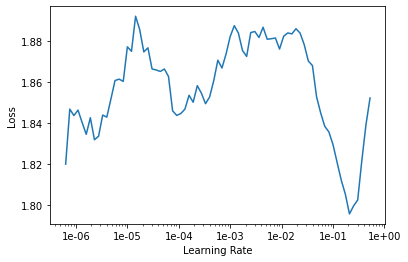

In [39]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [40]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.943897,0.956283,00:12
1,0.867798,0.886480,00:12
2,0.780085,0.835116,00:12
3,0.651624,0.808793,00:12
4,0.560905,0.807856,00:12


In [41]:
learn.save('dotprod')

Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91, which corresponds to an MSE of `0.91**2 = 0.83`.

## Interpretation

### Setup

In [45]:
learn.load('dotprod');

In [47]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [48]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

# top movies are the most watched movies

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

### Movie bias

In [49]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

# most rated movie becomes the bias
# So is_item=True, you would pass True to say I want the items or False to say I want the users. 


torch.Size([1000])

In [51]:
#Just for comparison, let's also group the titles by the mean rating. Then we can zip through (i.e. going through together) each of the movies along with the bias and grab their rating, the bias, and the movie. 
#Then we can sort them all by the zero index thing which is the bias.

mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [52]:
item0 = lambda o:o[0]

In [53]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3432),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.2938),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2831), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2788), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2680), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2614), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2445), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.2258), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2237), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2137), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2135), 'Showgirls (1995)', 1.9565217391304348),
 (tensor(-0.2116), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2116), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2112), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (te

In [54]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.6310), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5637), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5637), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5312), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5120), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5092), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.5037), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.5014), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.4980), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.4870), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4775), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4675), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4610), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4566), "One Flew Over the Cuckoo's Nest (1975)", 4.291666666666667),
 (tensor(0.4527), 'Vertigo (1958)', 4.251396648044692)]

### Movie weights

In [55]:
#We can go a bit further and grab not just the biases but the weights.

movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

# That is a thousand by forty because we asked for 40 factors, so rather than having a width of 5, we have a width of 40.

torch.Size([1000, 40])

In [56]:
movie_pca = movie_w.pca(3)
movie_pca.shape

#So what we want to do is, we want to squish those 40 down to just 3. And there's something that we're not going to look into called PCA stands for Principal Components Analysis. This movie_w is a torch tensor and fastai adds the PCA method to torch tensors. What Principal Components Analysis does is it's a simple linear transformation that takes an input matrix and tries to find a smaller number of columns that cover a lot of the space of that original matrix. If that sounds interesting, which it totally is, you should check out our course, computational linear algebra, which Rachel teaches where we will show you how to calculate PCA from scratch and why you'd want to do it and lots of stuff like that. It's absolutely not a prerequisite for anything in this course, but it's definitely worth knowing that taking layers of neural nets and chucking them through PCA is very often a good idea. Because very often you have way more activations than you want in a layer, 
# and there's all kinds of reasons you would might want to play with it

torch.Size([1000, 3])

In [57]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

# We can grab each of those three factors will call them fac0, fac1, and fac2. Let's grab that movie components and then sort.
# Now the thing is, we have no idea what this is going to mean

In [59]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1260), 'Wrong Trousers, The (1993)'),
 (tensor(1.1126), 'Close Shave, A (1995)'),
 (tensor(0.9914), 'Lawrence of Arabia (1962)'),
 (tensor(0.9888), 'Chinatown (1974)'),
 (tensor(0.9792), 'Citizen Kane (1941)'),
 (tensor(0.9676), 'When We Were Kings (1996)'),
 (tensor(0.9621),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(0.9540), 'Apocalypse Now (1979)'),
 (tensor(0.9193), 'Some Folks Call It a Sling Blade (1993)'),
 (tensor(0.9110), '12 Angry Men (1957)')]

In [60]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.3155), 'Home Alone 3 (1997)'),
 (tensor(-1.2731), 'Jungle2Jungle (1997)'),
 (tensor(-1.2644), "McHale's Navy (1997)"),
 (tensor(-1.1822), 'Congo (1995)'),
 (tensor(-1.1693), 'Children of the Corn: The Gathering (1996)'),
 (tensor(-1.1383), 'Leave It to Beaver (1997)'),
 (tensor(-1.1027), 'Bio-Dome (1996)'),
 (tensor(-1.1019), 'Flipper (1996)'),
 (tensor(-1.0918), 'Grease 2 (1982)'),
 (tensor(-1.0902), 'D3: The Mighty Ducks (1996)')]

In [61]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [62]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.8683), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.8452), 'Keys to Tulsa (1997)'),
 (tensor(0.8295), 'Trainspotting (1996)'),
 (tensor(0.7980), 'Dead Man (1995)'),
 (tensor(0.7854), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(0.7425), 'Very Brady Sequel, A (1996)'),
 (tensor(0.7253), 'Spice World (1997)'),
 (tensor(0.7250), 'Clockwork Orange, A (1971)'),
 (tensor(0.6931), 'Crow: City of Angels, The (1996)'),
 (tensor(0.6914), 'Stupids, The (1996)')]

In [63]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.2304), 'Braveheart (1995)'),
 (tensor(-1.2214), 'Raiders of the Lost Ark (1981)'),
 (tensor(-1.1065), 'Titanic (1997)'),
 (tensor(-0.8832), "It's a Wonderful Life (1946)"),
 (tensor(-0.8781), 'Independence Day (ID4) (1996)'),
 (tensor(-0.8756), 'Star Wars (1977)'),
 (tensor(-0.8662), 'Hunt for Red October, The (1990)'),
 (tensor(-0.8563), 'Indiana Jones and the Last Crusade (1989)'),
 (tensor(-0.8484), 'Return of the Jedi (1983)'),
 (tensor(-0.8453), 'Back to the Future (1985)')]

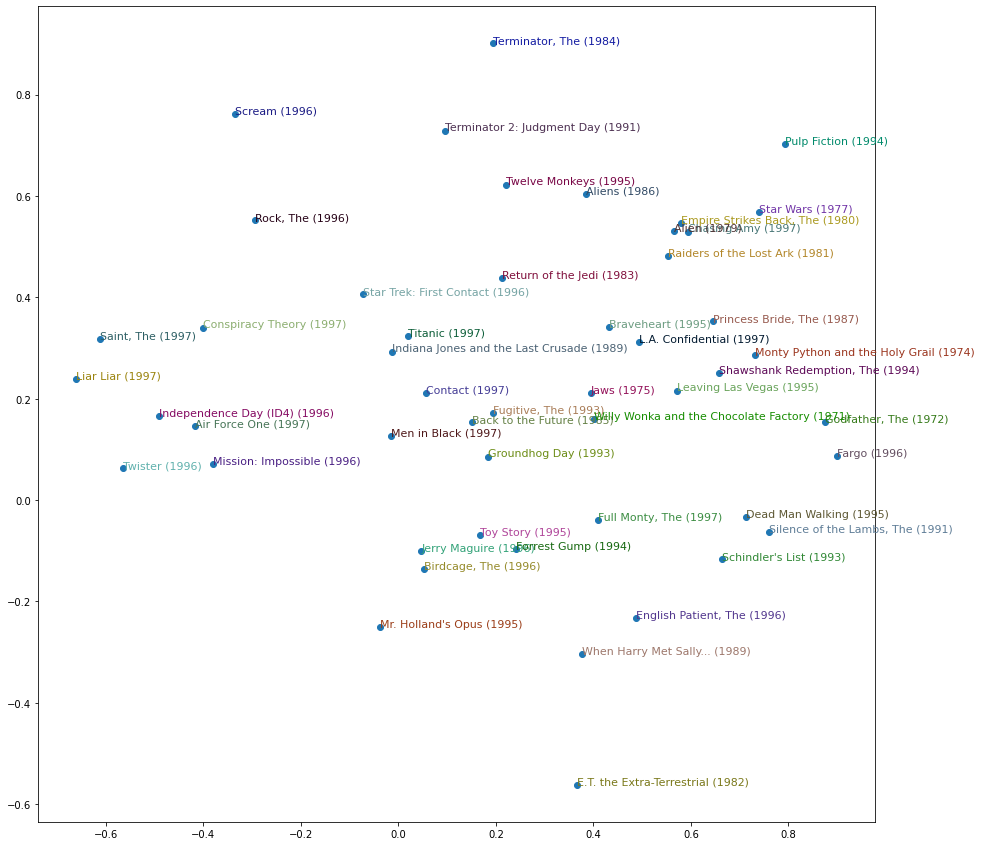

In [64]:
# drawing them on a map

idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()